# Valores Perdidos (Missing)

In [3]:
import pandas as pd #Tratamiento de datos
import os #Ficheros de directorios
mainpath = "/content/sample_data/" #Ruta de archivos
filename = "titanic3.csv" #Nombre del archivo
fullpath = os.path.join(mainpath, filename)

In [4]:
#CARGAR TUS BASES
data = pd.read_csv(fullpath)
data
#data.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [5]:
#COLUMNAS QUE NO CONTENGAN MISSING - ELIMINAR COLUMNAS QUE CONTENGA ALGÚN MISSING
Columns_with_na_dropped = data.dropna(axis=1)
Columns_with_na_dropped.head()

,pclass,survived,name,sex,sibsp,parch,ticket
0,1,1,"Allen, Miss. Elisabeth Walton",female,0,0,24160
1,1,1,"Allison, Master. Hudson Trevor",male,1,2,113781
2,1,0,"Allison, Miss. Helen Loraine",female,1,2,113781
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,1,2,113781
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,1,2,113781


In [6]:
#FILAS QUE NO CONTENGAN MISSING
Rows_with_na_dropped = data.dropna(axis=0)
Rows_with_na_dropped.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest


In [7]:
#IMPRIMIR NÚMERO DE COLUMNAS ORIGINALES - Y COLUMNAS FINALES
print("Columnas en el conjunto de datos original: %d" % data.shape[1])
print("Columnas finales: %d" % Columns_with_na_dropped.shape[1])

Columnas en el conjunto de datos original: 14
Columnas finales: 7


In [8]:
#porcentaje de columnas sin missing
print(str(Columns_with_na_dropped.shape[1]/data.shape[1]*100) + "%")

50.0%


In [9]:
#Número de columnas sin missing
Columns_with_na_dropped.shape[1]

7

In [10]:
#metodo visual para ver que columnas contienen algún missing
data.isnull().any()

,0
pclass,False
survived,False
name,False
sex,False
age,True
sibsp,False
parch,False
ticket,False
fare,True
cabin,True


In [11]:
#Columnas con missing
null_columns=data.columns[data.isnull().any()]
print(null_columns)

Index(['age', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'], dtype='object')


In [12]:
#numero de missing por columnas
data.isnull().sum()

,0
pclass,0
survived,0
name,0
sex,0
age,263
sibsp,0
parch,0
ticket,0
fare,1
cabin,1014


In [13]:
#numero de missing por columnas
data.isnull().sum()/1309

,0
pclass,0.000000
survived,0.000000
name,0.000000
sex,0.000000
age,0.200917
sibsp,0.000000
parch,0.000000
ticket,0.000000
fare,0.000764
cabin,0.774637


In [14]:
pip install missingno

In [15]:
import missingno as msno

<Axes: >

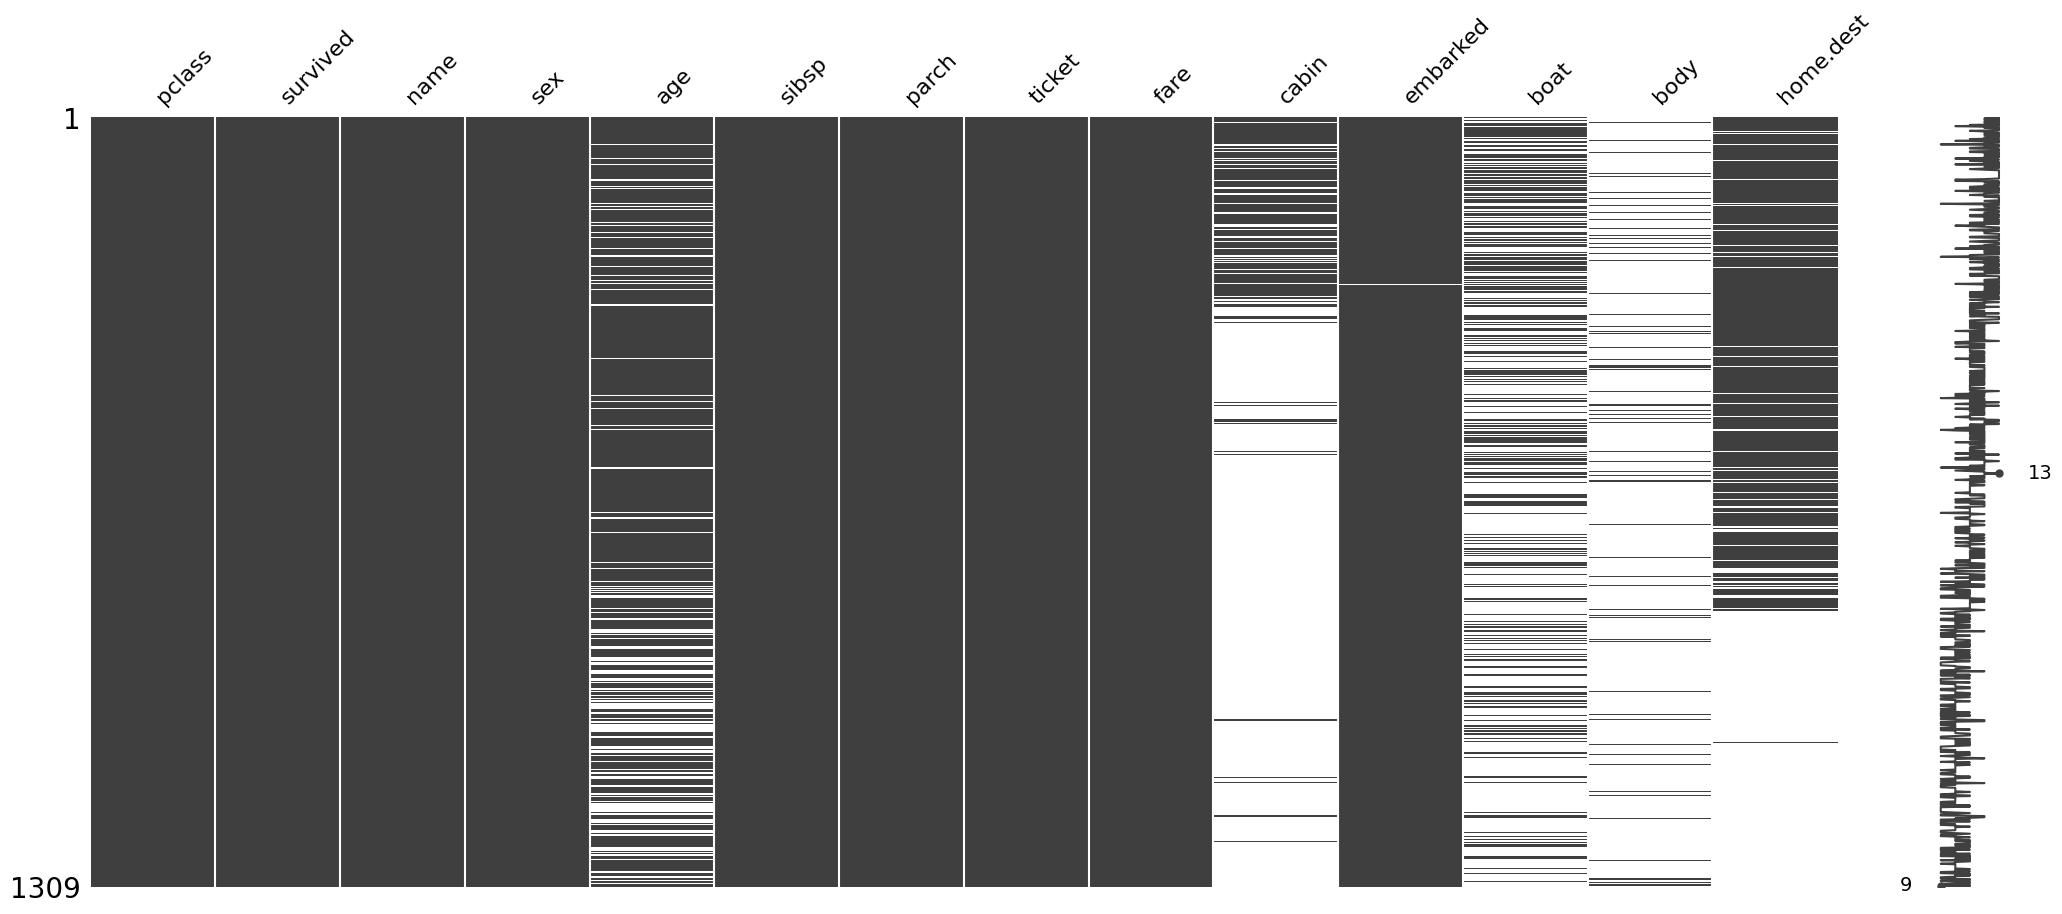

In [16]:
msno.matrix(data)

<Axes: >

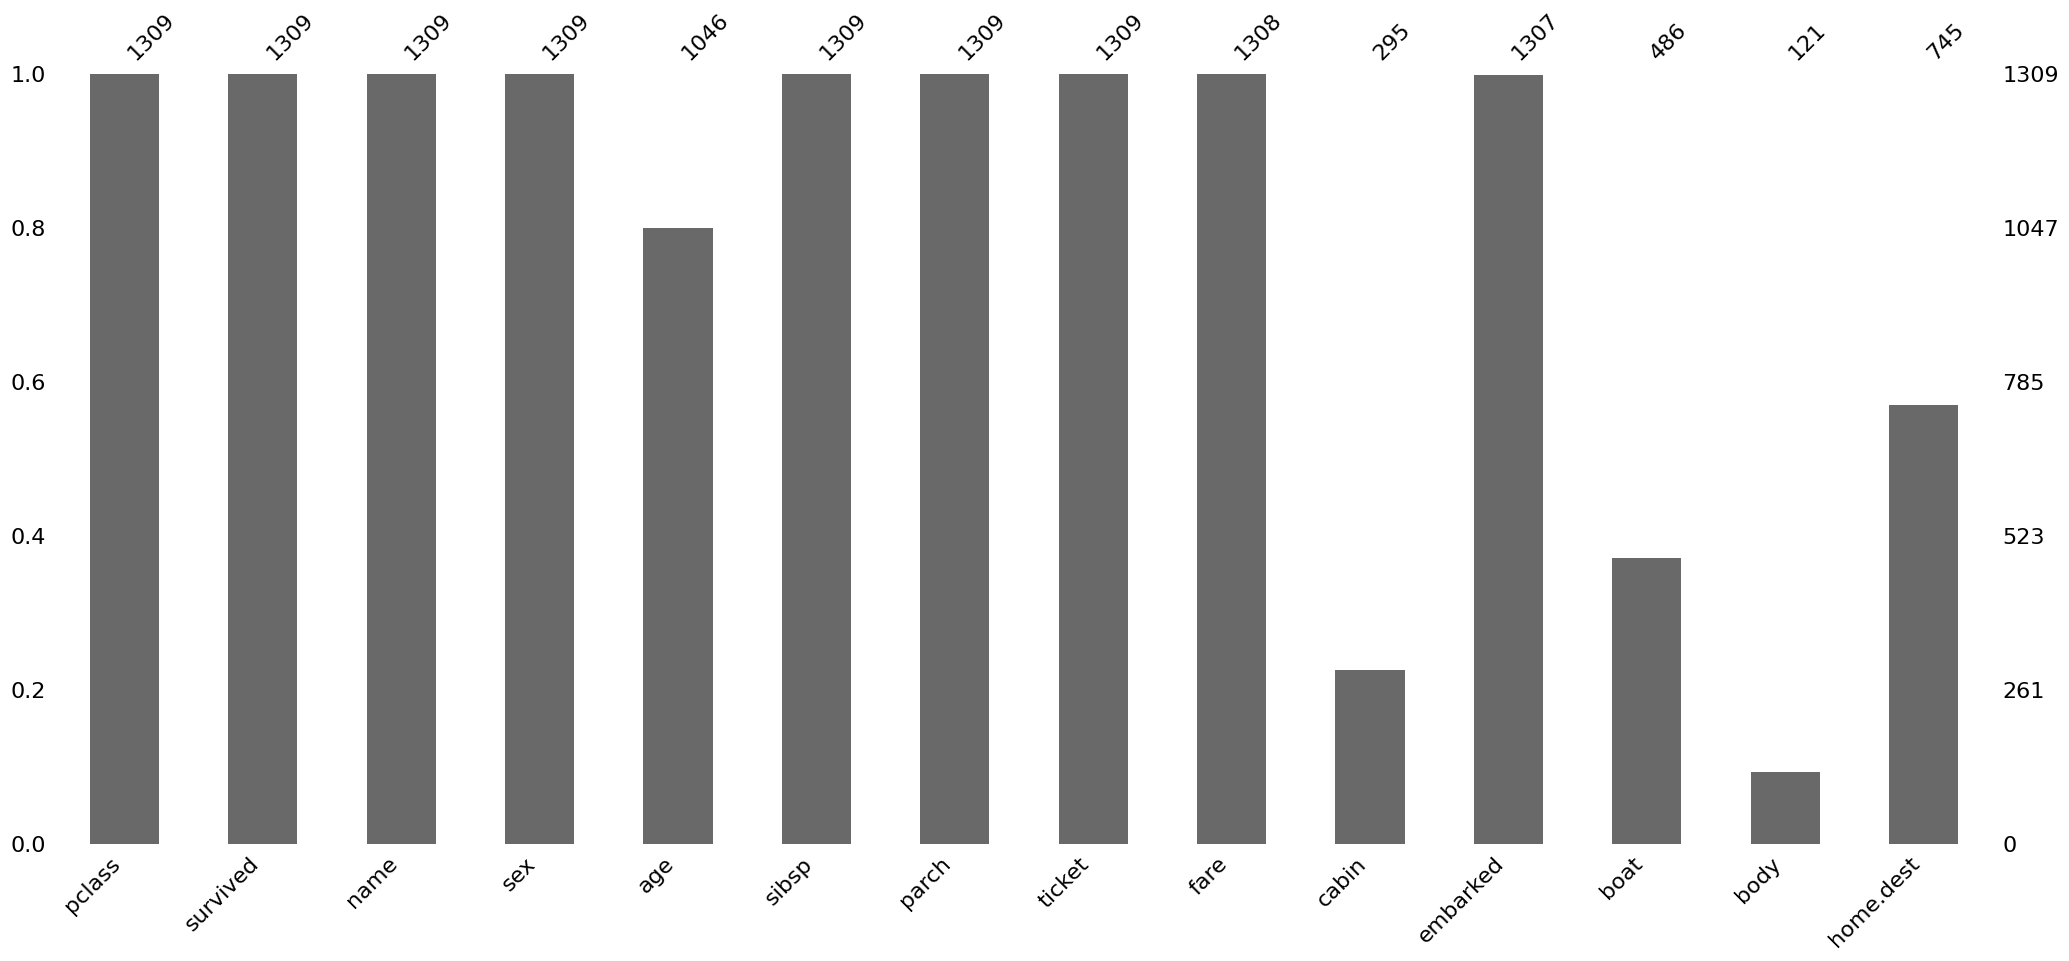

In [17]:
msno.bar(data)

<Axes: >

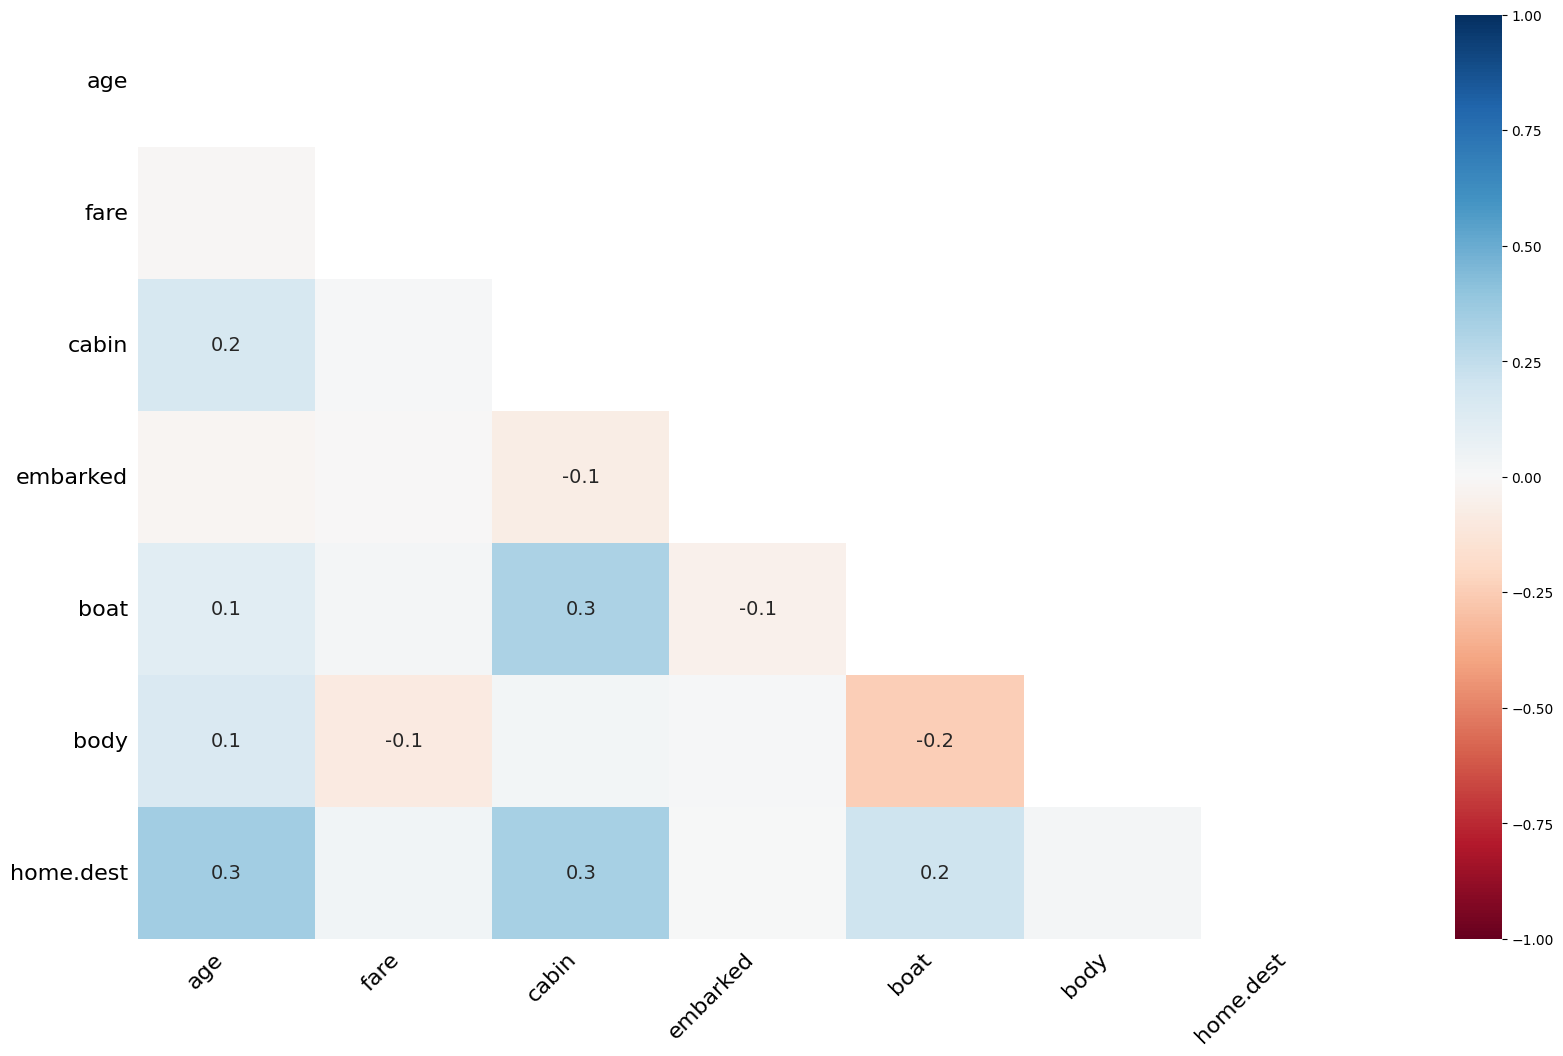

In [18]:
#Matriz de correlaciones entre el numero de missing en cada columna
msno.heatmap(data)

# Imputaciones

In [19]:
data["age"]

,age
0,29.0000
1,0.9167
2,2.0000
3,30.0000
4,25.0000
...,...
1304,14.5000
1305,NaN
1306,26.5000
1307,27.0000


In [20]:
#Imputacion Forward Fill. Si la BD está ordenada por una variable. Ejemplo: Series de tiempo
data["age"].fillna(method="ffill")

<ipython-input-20-dd6f2bec9595>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data["age"].fillna(method="ffill")


,age
0,29.0000
1,0.9167
2,2.0000
3,30.0000
4,25.0000
...,...
1304,14.5000
1305,14.5000
1306,26.5000
1307,27.0000


In [21]:
# Imputacion Backward Fill. Si la BD esta agrupada por rango de edades
data["age"].fillna(method="bfill")

<ipython-input-21-bc69caa9682f>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data["age"].fillna(method="bfill")


,age
0,29.0000
1,0.9167
2,2.0000
3,30.0000
4,25.0000
...,...
1304,14.5000
1305,26.5000
1306,26.5000
1307,27.0000


In [22]:
print(data["age"].mean()) #No usar cuando hay valores extremos
print(data["age"].median()) #La mediana no es sensible a valores extremos
print(data["age"].mode()) #No usar cuando hay desagregaciones

29.8811345124283
28.0
0    24.0
Name: age, dtype: float64


In [23]:
data["age"].fillna(data["age"].median())

,age
0,29.0000
1,0.9167
2,2.0000
3,30.0000
4,25.0000
...,...
1304,14.5000
1305,28.0000
1306,26.5000
1307,27.0000


In [24]:
n=data[data["sex"]=="female"]["age"].mean()
print(n)

28.6870706185567


In [25]:
m=data[data["sex"]=="male"]["age"].mean()
print(m)

30.5852329787234


# Feature Engine - Imputaciones
## Instalación de librería

In [26]:
pip install feature_engine

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 378.6/378.6 kB 9.7 MB/s eta 0:00:00


In [27]:
import feature_engine
from feature_engine.imputation import MeanMedianImputer

In [28]:
data.dtypes

,0
pclass,int64
survived,int64
name,object
sex,object
age,float64
sibsp,int64
parch,int64
ticket,object
fare,float64
cabin,object


## MeanMedianImputer

In [29]:
median_imputer = MeanMedianImputer(
                   imputation_method='median',
                   variables=['body','age','fare']
                   )

In [30]:
median_imputer.fit(data)
data_t= median_imputer.transform(data)

In [31]:
data_t

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,155.0,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,155.0,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,155.0,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,155.0,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,28.0000,1,0,2665,14.4542,NaN,C,NaN,155.0,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,155.0,NaN


<Axes: >

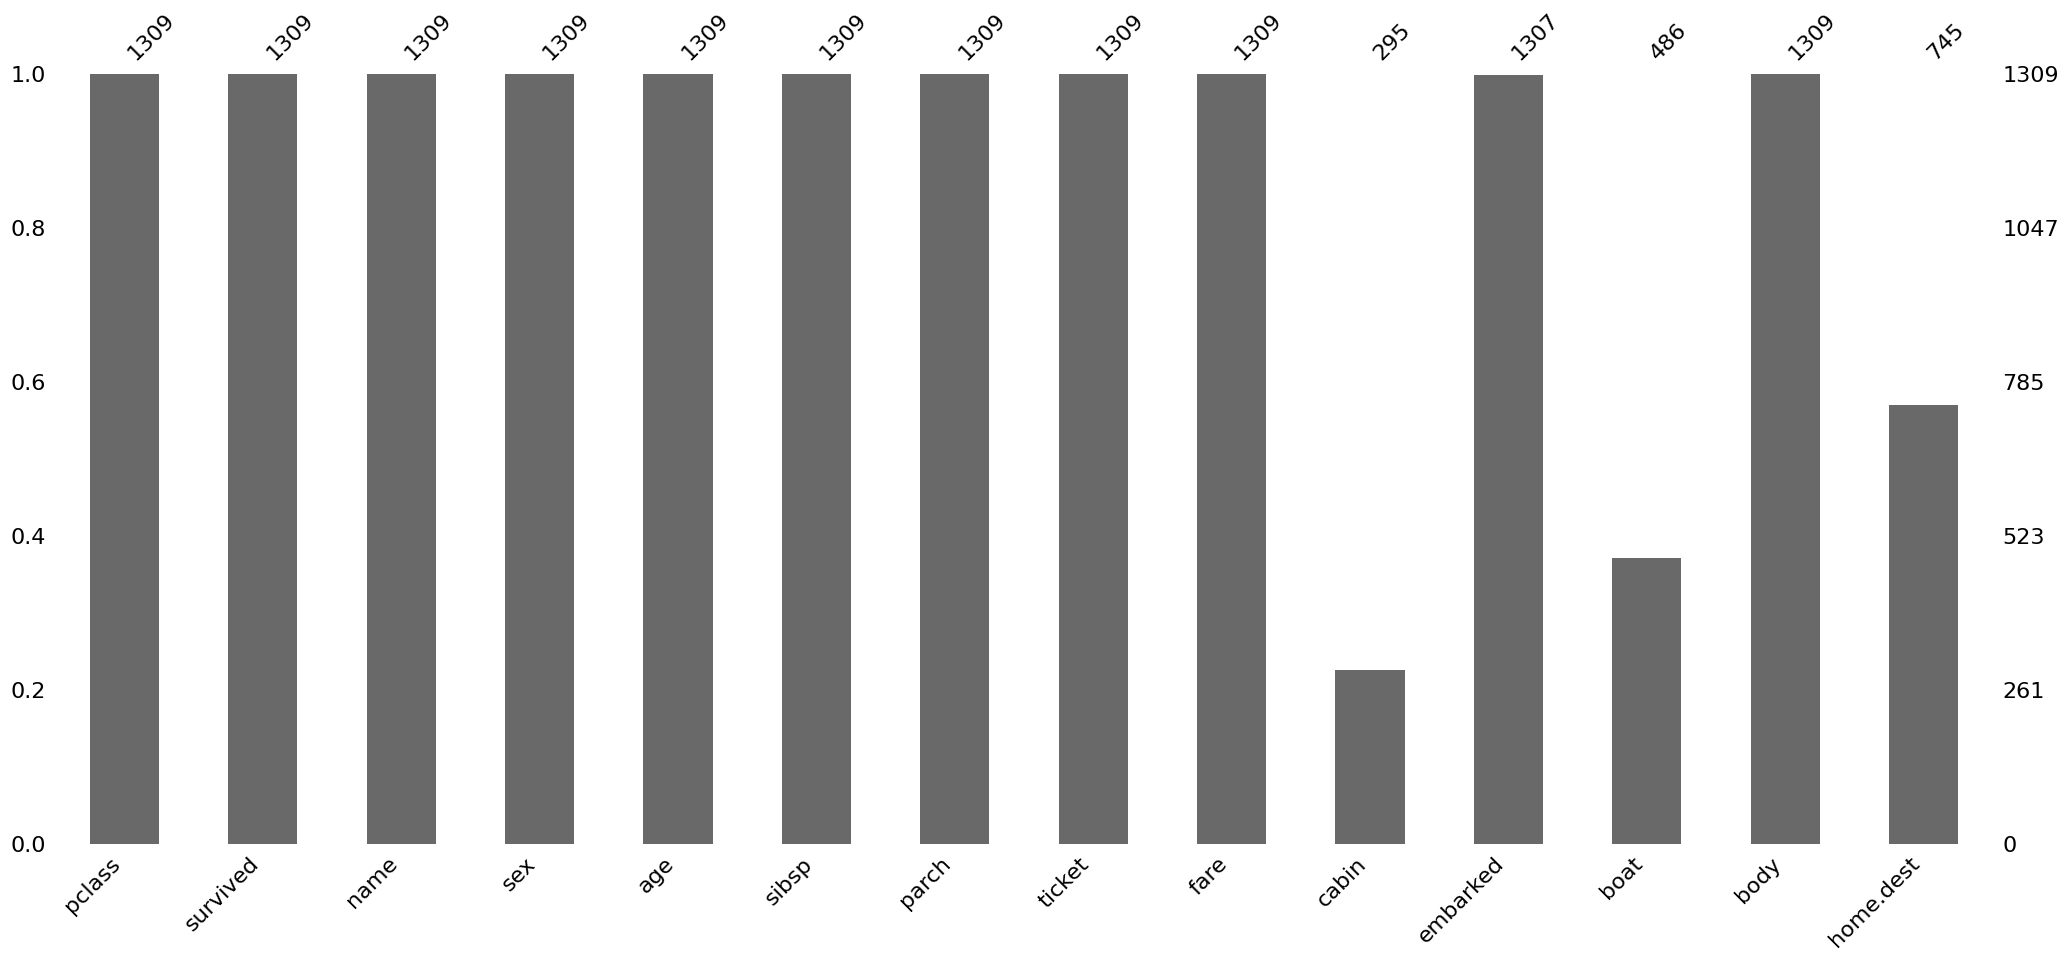

In [32]:
msno.bar(data_t)

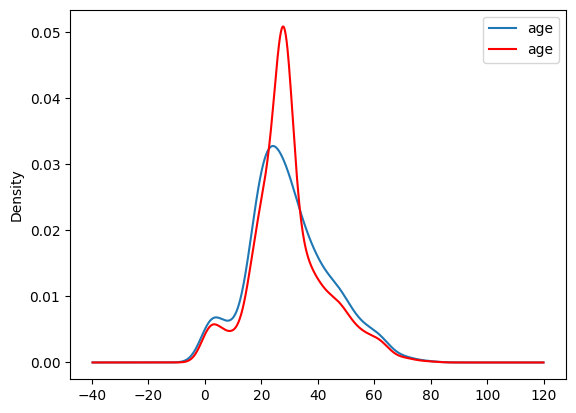

In [33]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
data['age'].plot(kind='kde', ax=ax)
data_t['age'].plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

## ArbitraryNumberImpute

In [34]:
from feature_engine.imputation import ArbitraryNumberImputer

In [35]:
arbitrary_impute = ArbitraryNumberImputer(arbitrary_number=-999)
arbitrary_impute.fit(data)
data_ani = arbitrary_impute.transform(data)
data_ani

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,-999.0,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,-999.0,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,-999.0,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,-999.0,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,-999.0000,1,0,2665,14.4542,NaN,C,NaN,-999.0,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,-999.0,NaN


<Axes: >

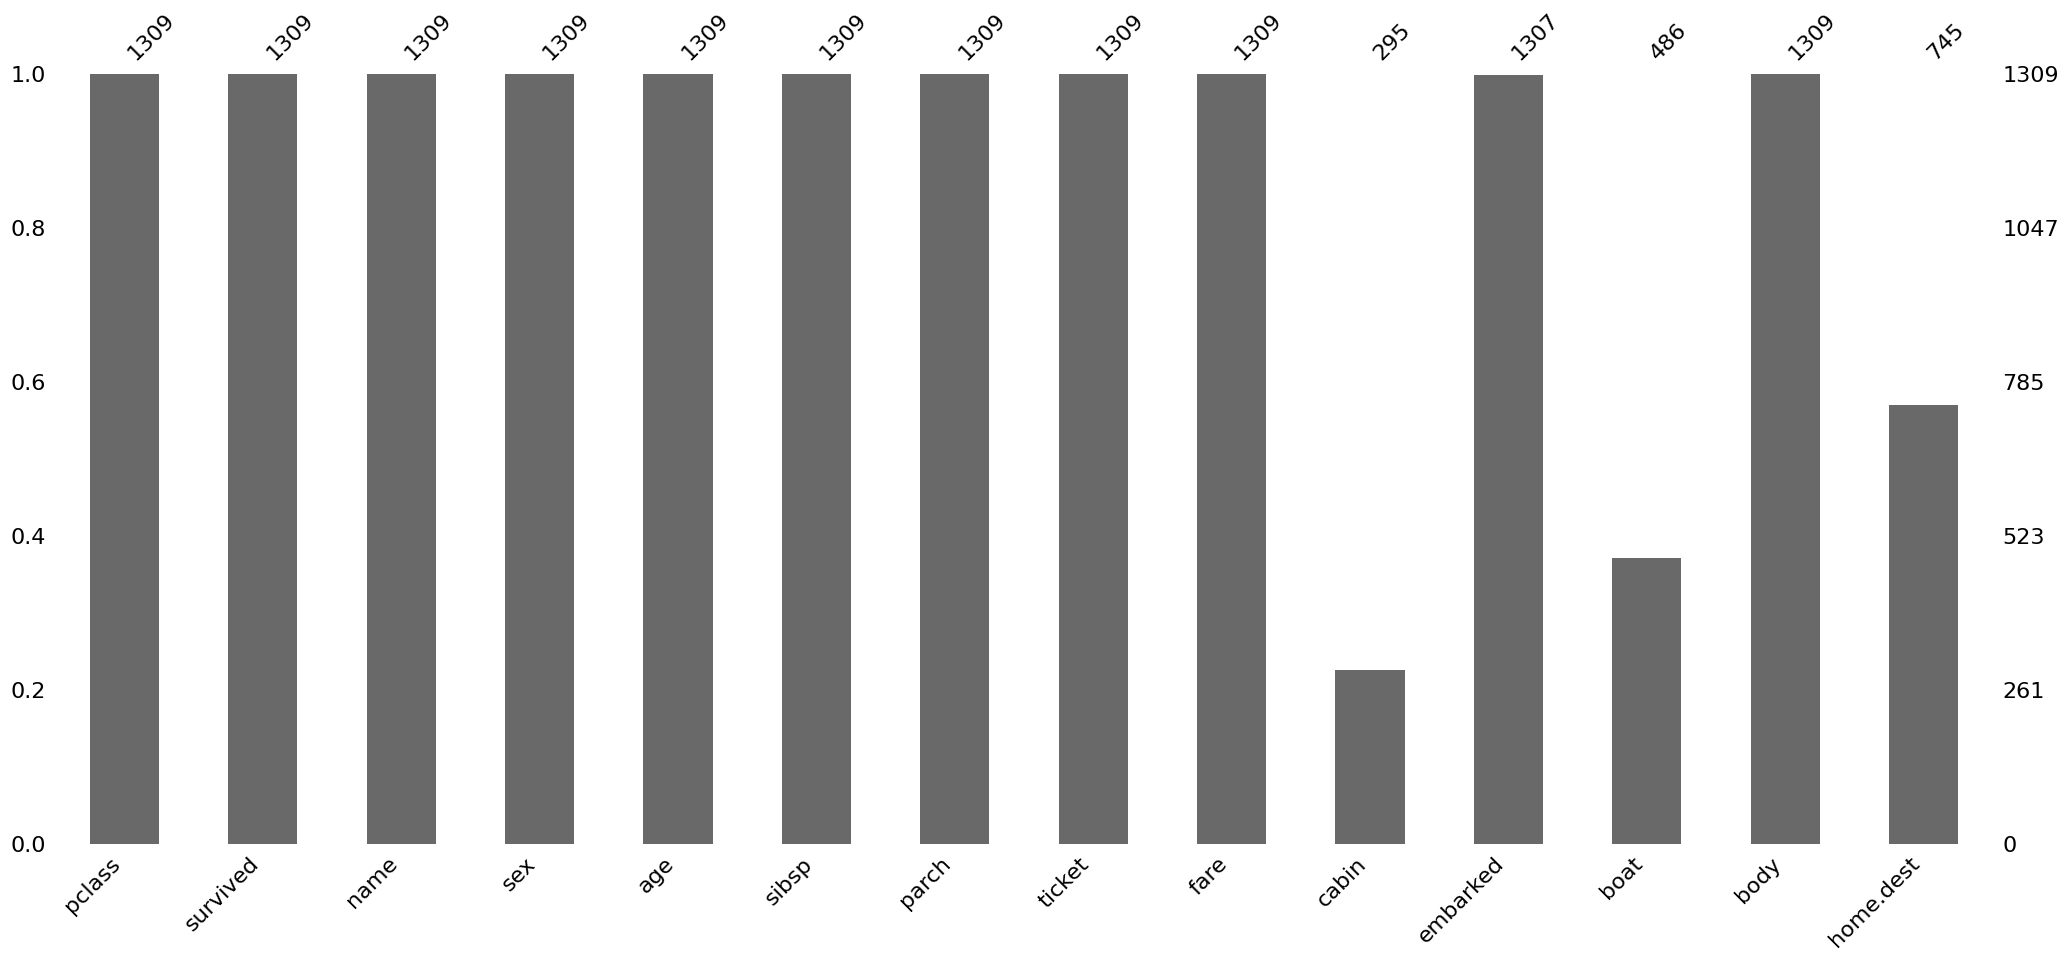

In [36]:
msno.bar(data_ani)

## RandomSampleImputer

In [37]:
from feature_engine.imputation import RandomSampleImputer

In [38]:
random_imputer = RandomSampleImputer(
        random_state=['body','age','fare'],
        seed='observation',
        seeding_method='add'
    )
random_imputer.fit(data)
data_rsi = random_imputer.transform(data)
data_rsi

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,45.0,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,196.0,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,C,299.0,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,13,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,11,35.0,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,C78,C,7,328.0,"St Louis, MO"
1305,3,0,"Zabour, Miss. Thamine",female,21.0000,1,0,2665,14.4542,B57 B59 B63 B66,C,10,299.0,"New York, NY"
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,C86,C,1,304.0,"Sweden Worcester, MA"
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,C83,C,16,245.0,"Bryn Mawr, PA"


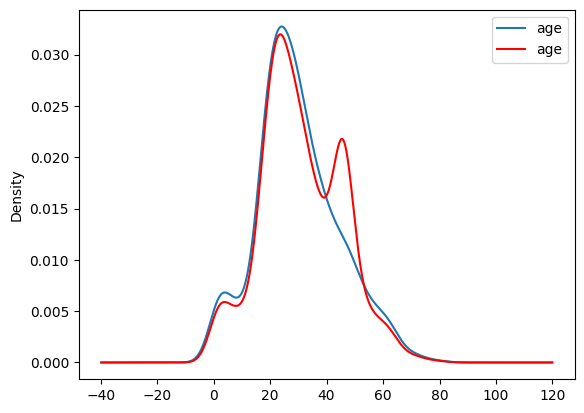

In [39]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
data['age'].plot(kind='kde', ax=ax)
data_rsi['age'].plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

## CategoricalImputer

In [40]:
from feature_engine.imputation import CategoricalImputer

In [41]:
categorical_imputer = CategoricalImputer(imputation_method='frequent', variables=['cabin', 'embarked', 'boat', 'home.dest'])
categorical_imputer.fit(data_t)
data_ci = categorical_imputer.transform(data_t)
data_ci

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,155.0,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,155.0,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,13,155.0,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,13,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,13,155.0,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,C23 C25 C27,C,13,328.0,"New York, NY"
1305,3,0,"Zabour, Miss. Thamine",female,28.0000,1,0,2665,14.4542,C23 C25 C27,C,13,155.0,"New York, NY"
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,C23 C25 C27,C,13,304.0,"New York, NY"
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,C23 C25 C27,C,13,155.0,"New York, NY"


<Axes: >

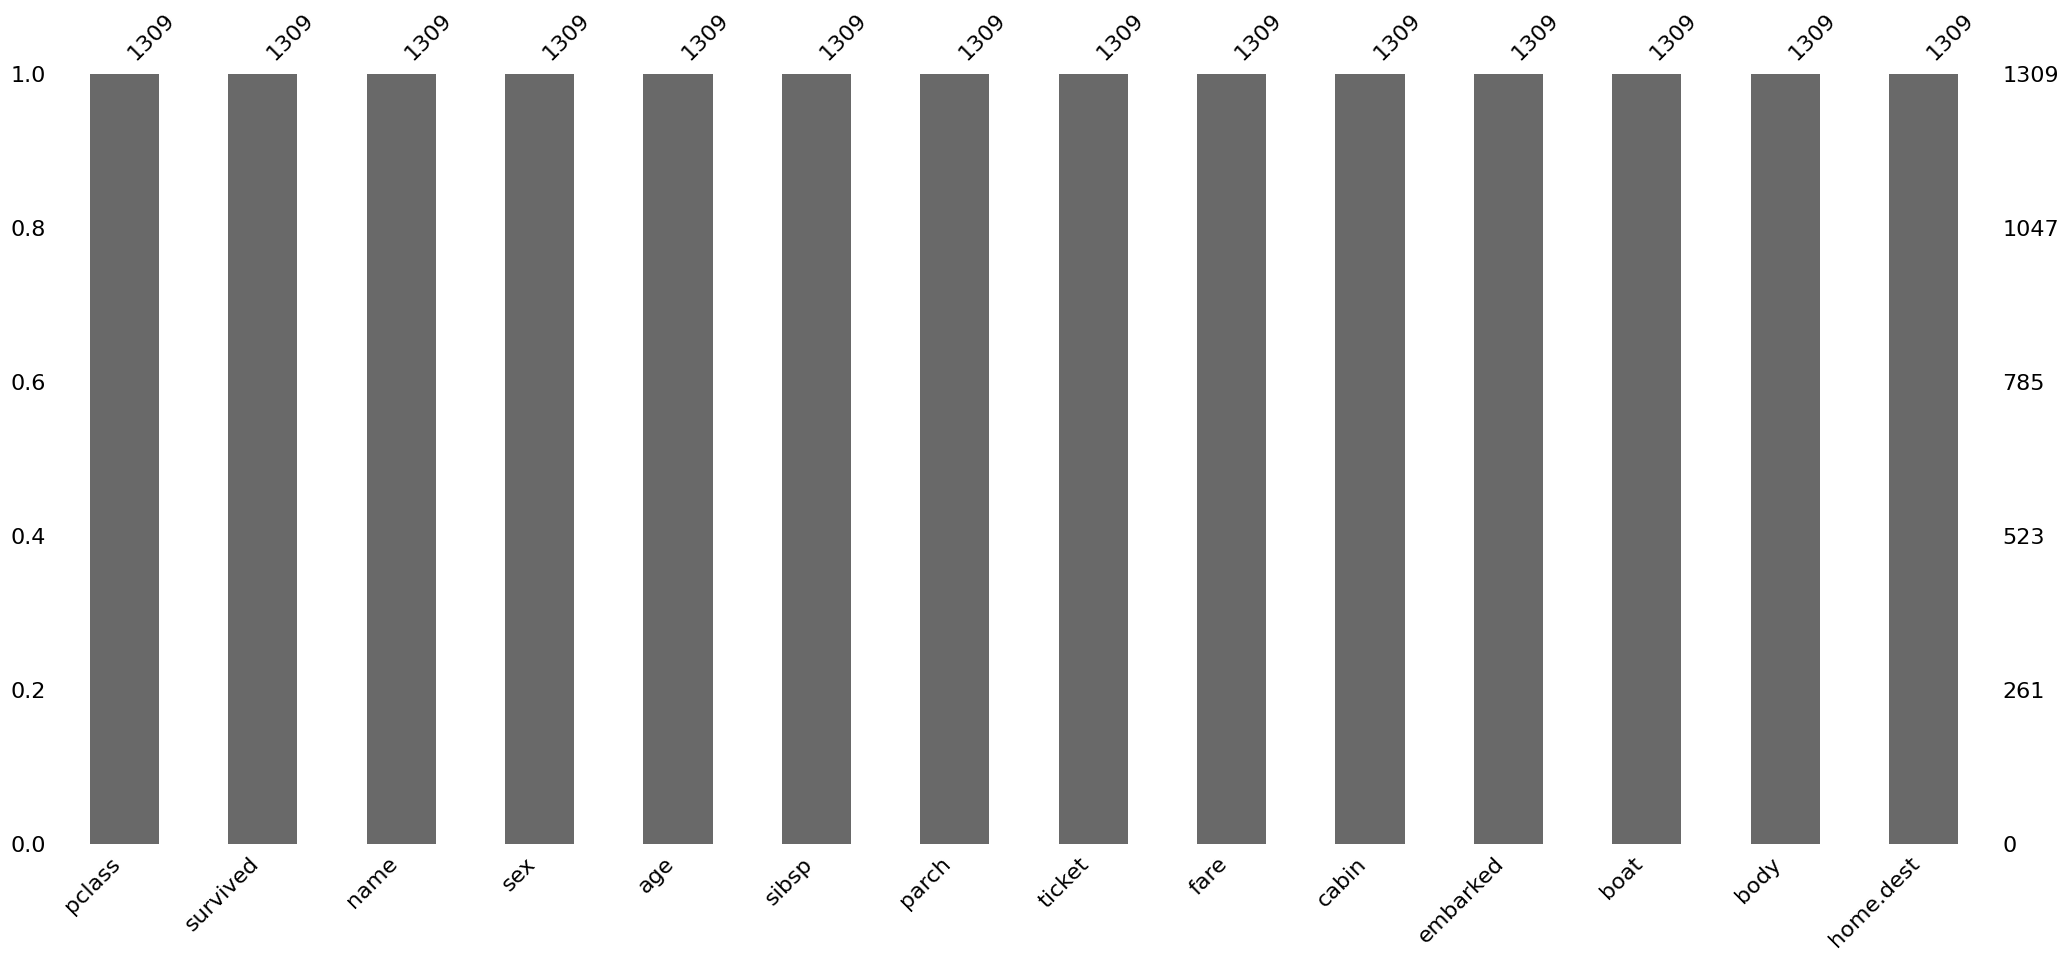

In [42]:
msno.bar(data_ci)

# Outliers

In [43]:
#Nos vamos a crear una data simulada
import pandas as pd
import numpy as np
import random
np.random.seed(20)
mu, sigma = 0, 0.1 # para una standar
dat1 = np.random.normal(mu,sigma,1000)
dat2 = np.random.normal(mu,sigma,1000)
dat3 = np.random.normal(mu,sigma,1000)
dat4 = np.random.normal(mu,sigma,1000)
dat5 = np.random.normal(mu,sigma,1000)
dat1=pd.DataFrame(data=dat1, columns = ['C1'])
dat2=pd.DataFrame(data=dat2, columns = ['C2'])
dat3=pd.DataFrame(data=dat3, columns = ['C3'])
dat4=pd.DataFrame(data=dat4, columns = ['C4'])
dat5=pd.DataFrame(data=dat5, columns = ['C5'])
final=pd.concat([dat1, dat2, dat3,dat4,dat5], axis=1)
final

,C1,C2,C3,C4,C5
0,0.088389,0.014160,0.122290,0.002702,0.107787
1,0.019587,-0.054995,-0.049631,-0.051860,0.129669
2,0.035754,0.113429,-0.182908,0.058071,-0.066771
3,-0.234326,0.079154,0.012082,0.070045,0.135251
4,-0.108483,-0.003539,0.030109,-0.045035,-0.043278
...,...,...,...,...,...
995,-0.077166,-0.163191,0.045152,-0.039525,0.107363
996,-0.083846,-0.031427,0.103903,0.081073,0.022377
997,-0.001413,-0.020870,-0.090211,0.052768,-0.196171
998,0.207735,-0.008636,-0.053343,0.009226,-0.073919


## Boxplot

<Axes: >

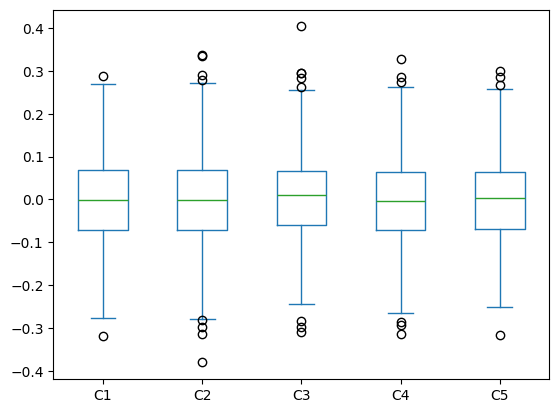

In [44]:
final.plot.box() #grid='True'

Text(0.5, 1.0, 'Título')

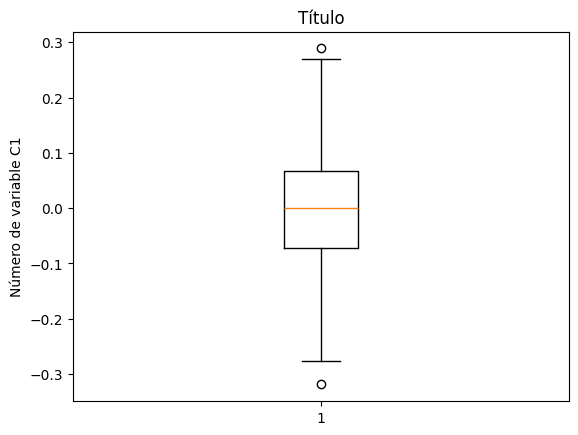

In [45]:
import matplotlib.pyplot as plt
plt.boxplot(final["C1"])
plt.ylabel("Número de variable C1")
plt.title("Título")

In [46]:
final.iloc[23:24, 4:5]=final.iloc[23:24, 4:5]*10
final.iloc[60:61, 4:5]=final.iloc[60:61, 4:5]*10

In [47]:
final.iloc[60:61, 4:5]

,C5
60,1.431494


In [48]:
final.iloc[23:24, 4:5]

,C5
23,-0.312961


<Axes: >

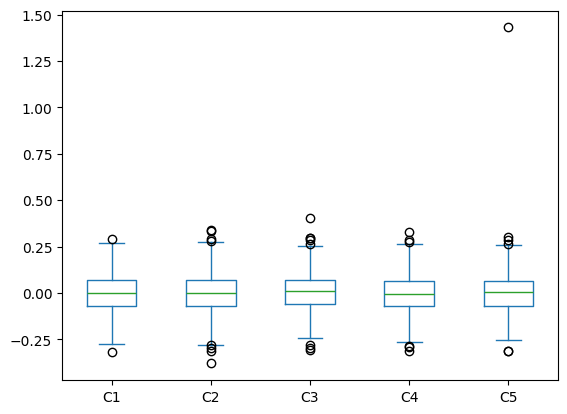

In [49]:
final.plot.box() #grid='True'

## Rango Intercuartilico

In [50]:
#valor outlier
iqr = final["C5"].quantile(0.75) - final["C5"].quantile(0.25)
final["flg_out"]=(final["C5"]< np.percentile(final["C5"], 25)-1.5*iqr) | (final["C5"]> np.percentile(final["C5"], 75)+1.5*iqr)

In [51]:
final[final["flg_out"]==True]

,C1,C2,C3,C4,C5,flg_out
23,0.133278,0.040309,-0.044483,-0.029653,-0.312961,True
57,0.150340,-0.017031,0.067384,-0.018522,0.286735,True
60,-0.082869,0.075935,0.085516,0.032553,1.431494,True
578,-0.017556,0.099622,0.041694,-0.038314,0.299323,True
789,-0.142838,0.127591,-0.085560,0.142109,-0.315420,True
934,0.165524,-0.154261,-0.030113,0.033099,0.265841,True


## Puntuación Z

In [52]:
from sklearn import preprocessing
p1=preprocessing.scale(final["C5"])
final["flg_out2"]=abs(p1)>2
final

,C1,C2,C3,C4,C5,flg_out,flg_out2
0,0.088389,0.014160,0.122290,0.002702,0.107787,False,False
1,0.019587,-0.054995,-0.049631,-0.051860,0.129669,False,False
2,0.035754,0.113429,-0.182908,0.058071,-0.066771,False,False
3,-0.234326,0.079154,0.012082,0.070045,0.135251,False,False
4,-0.108483,-0.003539,0.030109,-0.045035,-0.043278,False,False
...,...,...,...,...,...,...,...
995,-0.077166,-0.163191,0.045152,-0.039525,0.107363,False,False
996,-0.083846,-0.031427,0.103903,0.081073,0.022377,False,False
997,-0.001413,-0.020870,-0.090211,0.052768,-0.196171,False,False
998,0.207735,-0.008636,-0.053343,0.009226,-0.073919,False,False


In [53]:
final[final["flg_out2"]==True]

,C1,C2,C3,C4,C5,flg_out,flg_out2
23,0.133278,0.040309,-0.044483,-0.029653,-0.312961,True,True
57,0.150340,-0.017031,0.067384,-0.018522,0.286735,True,True
60,-0.082869,0.075935,0.085516,0.032553,1.431494,True,True
79,0.048740,-0.028125,-0.131821,0.016281,-0.248788,False,True
122,0.160599,0.045370,0.038516,-0.122487,-0.224194,False,True
174,0.042905,-0.033514,0.051242,-0.082272,-0.238704,False,True
207,0.171228,0.198677,0.127696,-0.153090,0.224351,False,True
212,0.054157,-0.017794,0.110644,0.060262,0.216929,False,True
252,0.180101,-0.127071,-0.112719,0.081054,0.250721,False,True
255,-0.114817,-0.038633,0.138094,0.030414,-0.217423,False,True


## Estimadores Robustos

In [54]:
final2=final.iloc[:, 0:5]
final2

,C1,C2,C3,C4,C5
0,0.088389,0.014160,0.122290,0.002702,0.107787
1,0.019587,-0.054995,-0.049631,-0.051860,0.129669
2,0.035754,0.113429,-0.182908,0.058071,-0.066771
3,-0.234326,0.079154,0.012082,0.070045,0.135251
4,-0.108483,-0.003539,0.030109,-0.045035,-0.043278
...,...,...,...,...,...
995,-0.077166,-0.163191,0.045152,-0.039525,0.107363
996,-0.083846,-0.031427,0.103903,0.081073,0.022377
997,-0.001413,-0.020870,-0.090211,0.052768,-0.196171
998,0.207735,-0.008636,-0.053343,0.009226,-0.073919


In [55]:
from scipy.spatial.distance import mahalanobis
import scipy as sp
import pandas as pd

x = final2
#x = x.iloc[:,1:]

#matriz de covarianzas
Sx = x.cov().values
#inversa de la matriz de covarianzas
Sx = sp.linalg.inv(Sx)

mean = x.mean().values

def mahalanobisR(X,meanCol,IC):
    m = []
    for i in range(X.shape[0]):
        m.append(mahalanobis(X.iloc[i,:],meanCol,IC) ** 2)
    return(m)

mR = pd.DataFrame(mahalanobisR(x,mean,Sx), columns = ['mR'])
final['mr']=mR

In [56]:
final['index'] = final.index
final

,C1,C2,C3,C4,C5,flg_out,flg_out2,mr,index
0,0.088389,0.014160,0.122290,0.002702,0.107787,False,False,3.186345,0
1,0.019587,-0.054995,-0.049631,-0.051860,0.129669,False,False,2.404597,1
2,0.035754,0.113429,-0.182908,0.058071,-0.066771,False,False,5.705727,2
3,-0.234326,0.079154,0.012082,0.070045,0.135251,False,False,8.542547,3
4,-0.108483,-0.003539,0.030109,-0.045035,-0.043278,False,False,1.655564,4
...,...,...,...,...,...,...,...,...,...
995,-0.077166,-0.163191,0.045152,-0.039525,0.107363,False,False,4.488254,995
996,-0.083846,-0.031427,0.103903,0.081073,0.022377,False,False,2.502722,996
997,-0.001413,-0.020870,-0.090211,0.052768,-0.196171,False,False,4.557502,997
998,0.207735,-0.008636,-0.053343,0.009226,-0.073919,False,False,5.457864,998


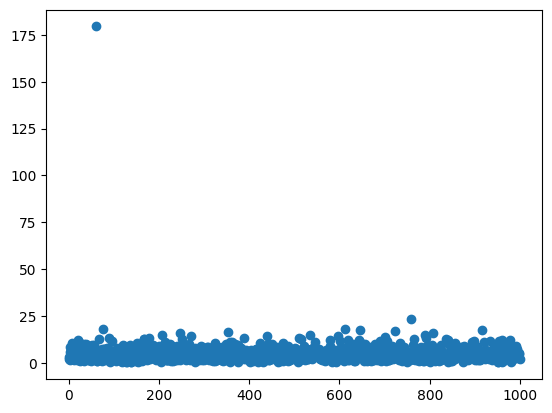

In [57]:
plt.scatter(final["index"],final['mr'])

In [58]:
final[final["mr"]>20]

,C1,C2,C3,C4,C5,flg_out,flg_out2,mr,index
60,-0.082869,0.075935,0.085516,0.032553,1.431494,True,True,179.436119,60
759,0.288782,0.251704,0.171881,0.120547,-0.193070,False,False,23.319516,759


# Feature Engine: Outliers

## Winsorizer

In [59]:
from feature_engine.outliers import Winsorizer

In [60]:
#Configurando la libreria
capper = Winsorizer(capping_method='iqr', tail='right', fold=1.5, variables=['age', 'fare'])

In [61]:
#Aplicar la configuración realizada
capper.fit(data_t)

Winsorizer(capping_method='iqr', fold=1.5, variables=['age', 'fare'])

In [62]:
capper.right_tail_caps_

{'age': 54.5, 'fare': 66.34379999999999}

In [63]:
data_t1= capper.transform(data_t)

In [64]:
data_t1[['fare', 'age']].max()

,0
fare,66.3438
age,54.5000


In [65]:
data_t[['fare', 'age']].max()

,0
fare,512.3292
age,80.0000


Text(0.5, 1.0, 'fare')

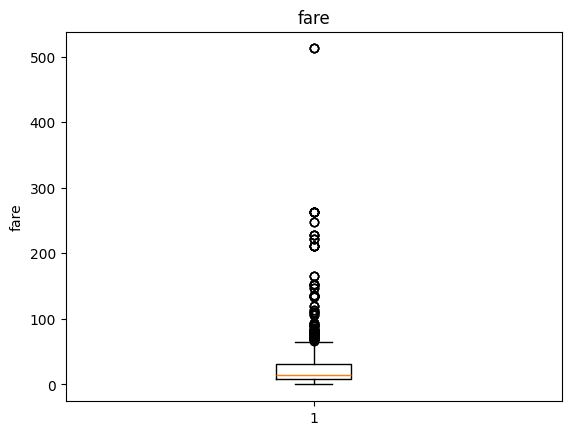

In [66]:
import matplotlib.pyplot as plt
plt.boxplot(data_t["fare"])
plt.ylabel("fare")
plt.title("fare")

Text(0.5, 1.0, 'fare')

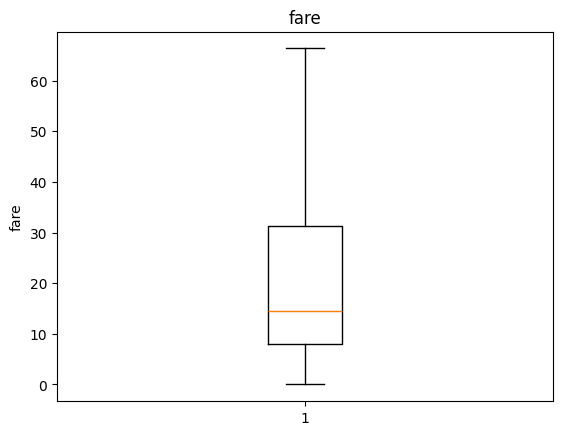

In [67]:
import matplotlib.pyplot as plt
plt.boxplot(data_t1["fare"])
plt.ylabel("fare")
plt.title("fare")

# Arbitrary Outlier Capper

In [68]:
from feature_engine.outliers import ArbitraryOutlierCapper
aoc = ArbitraryOutlierCapper(max_capping_dict=dict(fare =  70),
                             min_capping_dict=dict(fare = 0))

In [69]:
aoc.fit(data_t)
data_t2 = aoc.transform(data_t)

In [70]:
aoc.right_tail_caps_

{'fare': 70}

In [71]:
data_t2[['fare']].max()

,0
fare,70.0


# Outlier Trimmer

In [72]:
from feature_engine.outliers import OutlierTrimmer

In [73]:
ot = OutlierTrimmer(capping_method='iqr',
                    tail='right',
                    fold=1.5,
                    variables=['age', 'fare'],
                    )

ot.fit(data_t)

OutlierTrimmer(capping_method='iqr', fold=1.5, variables=['age', 'fare'])

In [74]:
ot.right_tail_caps_

{'age': 54.5, 'fare': 66.34379999999999}

In [75]:
data_t3 = ot.transform(data_t)

In [76]:
data_t3[['fare', 'age']].max()

,0
fare,65.0
age,54.0


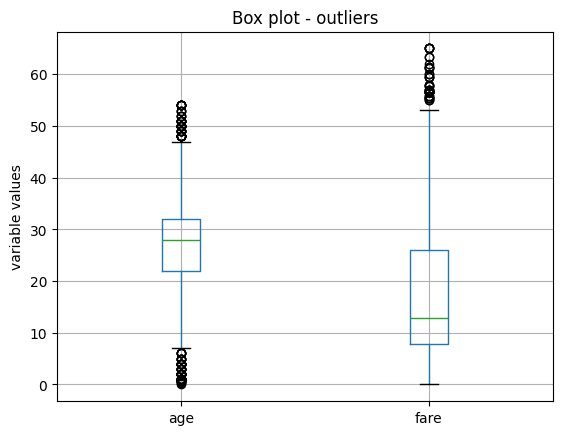

In [77]:
data_t3.boxplot(column=['age', "fare"])
plt.title("Box plot - outliers")
plt.ylabel("variable values")
plt.show()

# Transformaciones

## Normalización y escalamiento

In [78]:
import pandas as pd
import os
mainpath = "/content/sample_data/"
filename = "credit2.csv"
fullpath = os.path.join(mainpath, filename)
#CARGAR TUS BASES
#data = pd.read_csv(fullpath)
data = pd.read_csv(fullpath,sep=';')
data.head(10)
data.dtypes
data

,Y,Cuenta,Mes,Ppag,Uso,DM,Sexo,Estc
0,buen,no,18,pre buen pagador,privado,1049,mujer,vive solo
1,buen,no,9,pre buen pagador,profesional,2799,hombre,no vive solo
2,buen,bad running,12,pre buen pagador,profesional,841,mujer,vive solo
3,buen,no,12,pre buen pagador,profesional,2122,hombre,no vive solo
4,buen,no,12,pre buen pagador,profesional,2171,hombre,no vive solo
...,...,...,...,...,...,...,...,...
995,mal,no,24,pre buen pagador,privado,1987,hombre,no vive solo
996,mal,no,24,pre buen pagador,profesional,2303,hombre,no vive solo
997,mal,good running,21,pre buen pagador,profesional,12680,hombre,no vive solo
998,mal,bad running,12,pre buen pagador,privado,6468,hombre,no vive solo


In [79]:
data.dtypes

,0
Y,object
Cuenta,object
Mes,int64
Ppag,object
Uso,object
DM,int64
Sexo,object
Estc,object


### Crear factores categoricos

In [80]:
data['Y_2'] = pd.factorize(data["Y"])[0]
data[['Y_2','Y']]
data["Y_2"] = data["Y_2"].astype('category')
data["Y_2"]

,Y_2
0,0
1,0
2,0
3,0
4,0
...,...
995,1
996,1
997,1
998,1


In [81]:
data.dtypes

,0
Y,object
Cuenta,object
Mes,int64
Ppag,object
Uso,object
DM,int64
Sexo,object
Estc,object
Y_2,category


## Normalización Z-Score

In [82]:
from sklearn import preprocessing
data["DM_ZS"]=preprocessing.scale(data["DM"])
data

,Y,Cuenta,Mes,Ppag,Uso,DM,Sexo,Estc,Y_2,DM_ZS
0,buen,no,18,pre buen pagador,privado,1049,mujer,vive solo,0,-0.787657
1,buen,no,9,pre buen pagador,profesional,2799,hombre,no vive solo,0,-0.167384
2,buen,bad running,12,pre buen pagador,profesional,841,mujer,vive solo,0,-0.861381
3,buen,no,12,pre buen pagador,profesional,2122,hombre,no vive solo,0,-0.407341
4,buen,no,12,pre buen pagador,profesional,2171,hombre,no vive solo,0,-0.389974
...,...,...,...,...,...,...,...,...,...,...
995,mal,no,24,pre buen pagador,privado,1987,hombre,no vive solo,1,-0.455191
996,mal,no,24,pre buen pagador,profesional,2303,hombre,no vive solo,1,-0.343187
997,mal,good running,21,pre buen pagador,profesional,12680,hombre,no vive solo,1,3.334852
998,mal,bad running,12,pre buen pagador,privado,6468,hombre,no vive solo,1,1.133062


## Normalización Min-Max

In [83]:
from sklearn.preprocessing import MinMaxScaler
#[a,b] [0,1]
scaler = MinMaxScaler(feature_range=(0, 1))

A = scaler.fit_transform(data[["DM"]])

data["DM_MM"]=pd.DataFrame(data=A)
data["DM_MM"].max()
data

,Y,Cuenta,Mes,Ppag,Uso,DM,Sexo,Estc,Y_2,DM_ZS,DM_MM
0,buen,no,18,pre buen pagador,privado,1049,mujer,vive solo,0,-0.787657,0.043964
1,buen,no,9,pre buen pagador,profesional,2799,hombre,no vive solo,0,-0.167384,0.140255
2,buen,bad running,12,pre buen pagador,profesional,841,mujer,vive solo,0,-0.861381,0.032519
3,buen,no,12,pre buen pagador,profesional,2122,hombre,no vive solo,0,-0.407341,0.103004
4,buen,no,12,pre buen pagador,profesional,2171,hombre,no vive solo,0,-0.389974,0.105700
...,...,...,...,...,...,...,...,...,...,...,...
995,mal,no,24,pre buen pagador,privado,1987,hombre,no vive solo,1,-0.455191,0.095576
996,mal,no,24,pre buen pagador,profesional,2303,hombre,no vive solo,1,-0.343187,0.112964
997,mal,good running,21,pre buen pagador,profesional,12680,hombre,no vive solo,1,3.334852,0.683944
998,mal,bad running,12,pre buen pagador,privado,6468,hombre,no vive solo,1,1.133062,0.342137


## Normalización Escalamiento Decimal

In [84]:
maxvect=max(abs(data["DM"]))
maxvect

18424

In [85]:
import math
kvector=math.floor(math.log10(maxvect))
kvector=kvector+1
kvector

5

In [86]:
scalefactor = 10**kvector
scalefactor

100000

In [87]:
data["DM_ED"]=data["DM"]/scalefactor

In [88]:
data

,Y,Cuenta,Mes,Ppag,Uso,DM,Sexo,Estc,Y_2,DM_ZS,DM_MM,DM_ED
0,buen,no,18,pre buen pagador,privado,1049,mujer,vive solo,0,-0.787657,0.043964,0.01049
1,buen,no,9,pre buen pagador,profesional,2799,hombre,no vive solo,0,-0.167384,0.140255,0.02799
2,buen,bad running,12,pre buen pagador,profesional,841,mujer,vive solo,0,-0.861381,0.032519,0.00841
3,buen,no,12,pre buen pagador,profesional,2122,hombre,no vive solo,0,-0.407341,0.103004,0.02122
4,buen,no,12,pre buen pagador,profesional,2171,hombre,no vive solo,0,-0.389974,0.105700,0.02171
...,...,...,...,...,...,...,...,...,...,...,...,...
995,mal,no,24,pre buen pagador,privado,1987,hombre,no vive solo,1,-0.455191,0.095576,0.01987
996,mal,no,24,pre buen pagador,profesional,2303,hombre,no vive solo,1,-0.343187,0.112964,0.02303
997,mal,good running,21,pre buen pagador,profesional,12680,hombre,no vive solo,1,3.334852,0.683944,0.12680
998,mal,bad running,12,pre buen pagador,privado,6468,hombre,no vive solo,1,1.133062,0.342137,0.06468


## Normalización Softmax

In [89]:
import numpy as np
A = preprocessing.scale(data["DM"])
M=pd.DataFrame(data=A,columns=["A"])
M
M["A"]=M["A"]*-1
M
N=1/(1+np.exp(M["A"]))
data["DM_SM"]=N
data

,Y,Cuenta,Mes,Ppag,Uso,DM,Sexo,Estc,Y_2,DM_ZS,DM_MM,DM_ED,DM_SM
0,buen,no,18,pre buen pagador,privado,1049,mujer,vive solo,0,-0.787657,0.043964,0.01049,0.312672
1,buen,no,9,pre buen pagador,profesional,2799,hombre,no vive solo,0,-0.167384,0.140255,0.02799,0.458251
2,buen,bad running,12,pre buen pagador,profesional,841,mujer,vive solo,0,-0.861381,0.032519,0.00841,0.297051
3,buen,no,12,pre buen pagador,profesional,2122,hombre,no vive solo,0,-0.407341,0.103004,0.02122,0.399550
4,buen,no,12,pre buen pagador,profesional,2171,hombre,no vive solo,0,-0.389974,0.105700,0.02171,0.403724
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,mal,no,24,pre buen pagador,privado,1987,hombre,no vive solo,1,-0.455191,0.095576,0.01987,0.388127
996,mal,no,24,pre buen pagador,profesional,2303,hombre,no vive solo,1,-0.343187,0.112964,0.02303,0.415035
997,mal,good running,21,pre buen pagador,profesional,12680,hombre,no vive solo,1,3.334852,0.683944,0.12680,0.965605
998,mal,bad running,12,pre buen pagador,privado,6468,hombre,no vive solo,1,1.133062,0.342137,0.06468,0.756403


<Axes: >

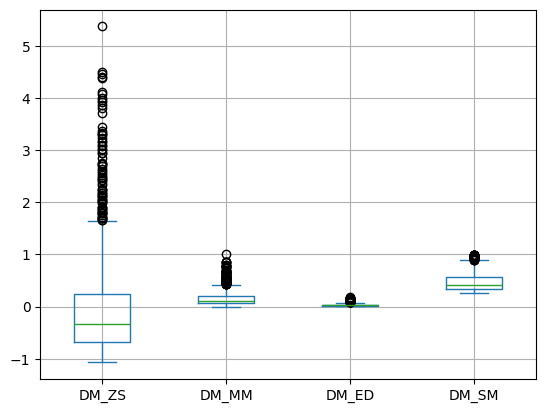

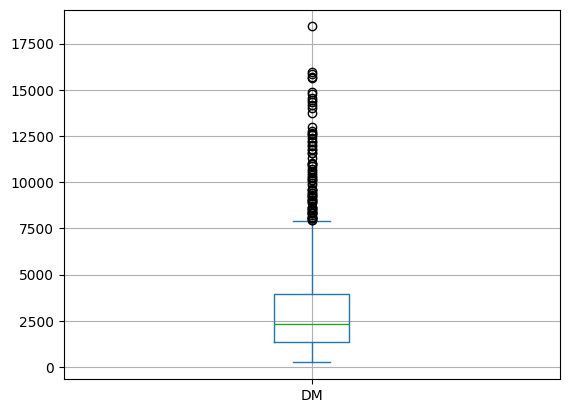

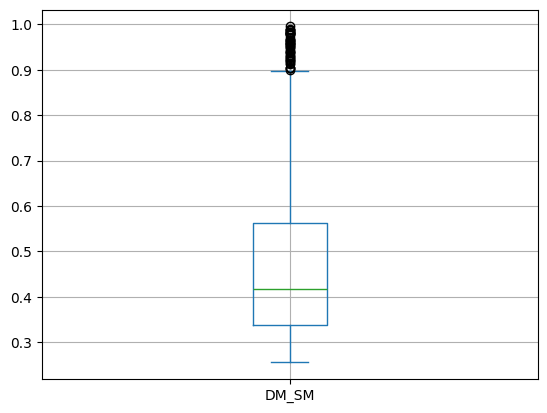

In [90]:
data.iloc[:,9:].plot.box(grid='True') #grid='True'
data.iloc[:,5:6].plot.box(grid='True') #grid='True'
data.iloc[:,12:13].plot.box(grid='True') #grid='True'

# Variables Categóricas y Transformaciones

In [91]:
pip install feature_engine

In [92]:
import pandas as pd
import os
mainpath = "/content/sample_data/"
filename = "credit2.csv"
fullpath = os.path.join(mainpath, filename)
#CARGAR TUS BASES
data = pd.read_csv(fullpath, sep=';')
data.head(10)
data.dtypes
data

,Y,Cuenta,Mes,Ppag,Uso,DM,Sexo,Estc
0,buen,no,18,pre buen pagador,privado,1049,mujer,vive solo
1,buen,no,9,pre buen pagador,profesional,2799,hombre,no vive solo
2,buen,bad running,12,pre buen pagador,profesional,841,mujer,vive solo
3,buen,no,12,pre buen pagador,profesional,2122,hombre,no vive solo
4,buen,no,12,pre buen pagador,profesional,2171,hombre,no vive solo
...,...,...,...,...,...,...,...,...
995,mal,no,24,pre buen pagador,privado,1987,hombre,no vive solo
996,mal,no,24,pre buen pagador,profesional,2303,hombre,no vive solo
997,mal,good running,21,pre buen pagador,profesional,12680,hombre,no vive solo
998,mal,bad running,12,pre buen pagador,privado,6468,hombre,no vive solo


## Factores de igual frecuencia

In [93]:
from feature_engine.discretisation import EqualFrequencyDiscretiser

In [94]:
disc = EqualFrequencyDiscretiser(q=10, variables=['DM'])
disc.fit(data)
data_t= disc.transform(data)
data_t["N"]=1
data_t

,Y,Cuenta,Mes,Ppag,Uso,DM,Sexo,Estc,N
0,buen,no,18,pre buen pagador,privado,1,mujer,vive solo,1
1,buen,no,9,pre buen pagador,profesional,5,hombre,no vive solo,1
2,buen,bad running,12,pre buen pagador,profesional,0,mujer,vive solo,1
3,buen,no,12,pre buen pagador,profesional,4,hombre,no vive solo,1
4,buen,no,12,pre buen pagador,profesional,4,hombre,no vive solo,1
...,...,...,...,...,...,...,...,...,...
995,mal,no,24,pre buen pagador,privado,4,hombre,no vive solo,1
996,mal,no,24,pre buen pagador,profesional,4,hombre,no vive solo,1
997,mal,good running,21,pre buen pagador,profesional,9,hombre,no vive solo,1
998,mal,bad running,12,pre buen pagador,privado,8,hombre,no vive solo,1


In [95]:
double_group = data_t.groupby(["DM"])

#double_group = data_t.groupby(["DM","Y"])
double_group.sum()[["N"]]

,N
DM,
0,100
1,101
2,99
3,100
4,100
5,100
6,101
7,99
8,100


## Factores de igual amplitud de intervalos

In [96]:
from feature_engine.discretisation import EqualWidthDiscretiser
data["DM_OR"]=data["DM"]
disc = EqualWidthDiscretiser(bins=10, variables=['DM'])
disc.fit(data)
data_t2= disc.transform(data)
data_t2["N"]=1
data_t2

,Y,Cuenta,Mes,Ppag,Uso,DM,Sexo,Estc,DM_OR,N
0,buen,no,18,pre buen pagador,privado,0,mujer,vive solo,1049,1
1,buen,no,9,pre buen pagador,profesional,1,hombre,no vive solo,2799,1
2,buen,bad running,12,pre buen pagador,profesional,0,mujer,vive solo,841,1
3,buen,no,12,pre buen pagador,profesional,1,hombre,no vive solo,2122,1
4,buen,no,12,pre buen pagador,profesional,1,hombre,no vive solo,2171,1
...,...,...,...,...,...,...,...,...,...,...
995,mal,no,24,pre buen pagador,privado,0,hombre,no vive solo,1987,1
996,mal,no,24,pre buen pagador,profesional,1,hombre,no vive solo,2303,1
997,mal,good running,21,pre buen pagador,profesional,6,hombre,no vive solo,12680,1
998,mal,bad running,12,pre buen pagador,privado,3,hombre,no vive solo,6468,1


    DM_OR
DM       
0     250
1    2069
2    3905
3    5711
4    7582
5    9398
6   11328
7   12976
8   14896
9   18424
    DM_OR
DM       
0    2064
1    3878
2    5595
3    7511
4    9283
5   11054
6   12749
7   14782
8   15945
9   18424
      N
DM     
0   445
1   293
2    97
3    80
4    38
5    19
6    14
7     8
8     5
9     1


<Axes: xlabel='DM'>

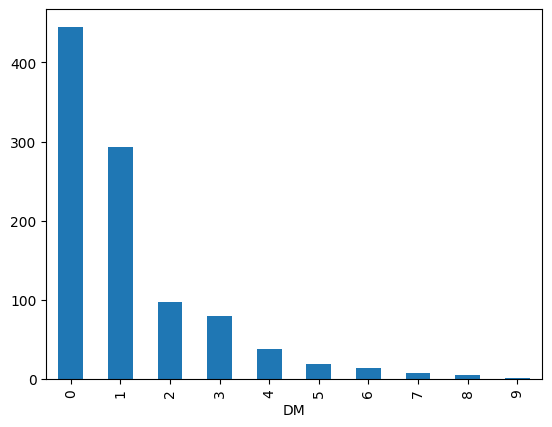

In [97]:
double_group = data_t2.groupby(["DM"])
double_group.sum()
print(double_group.min()[["DM_OR"]])
print(double_group.max()[["DM_OR"]])
#print(max(data["DM_OR"]))
print(double_group.sum()[["N"]])
data_t2.groupby('DM')['DM'].count().plot.bar()

# Transformación de variables

## Transformación Logaritmica

<Axes: >

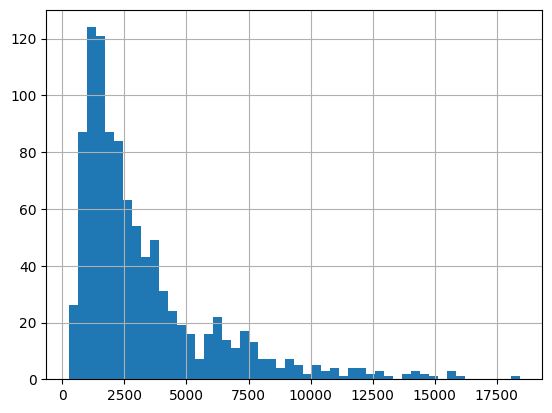

In [98]:
from feature_engine import transformation as vt
# set up the variable transformer
tf = vt.LogTransformer(variables = ['DM'])

# fit the transformer
tf.fit(data)

# transform the data
data_t4= tf.transform(data)
data_t4

# un-transformed variable
data['DM'].hist(bins=50)

<Axes: >

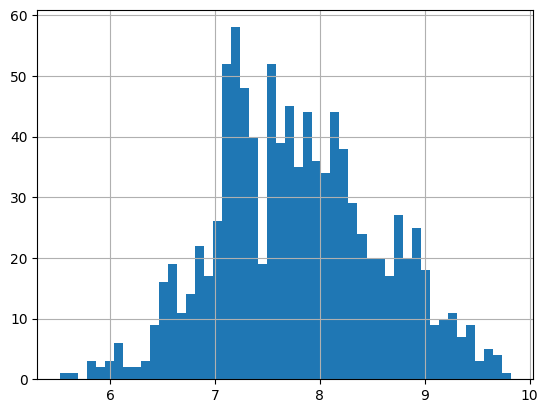

In [99]:
data_t4['DM'].hist(bins=50)

## Transformación Exponencial

<Axes: >

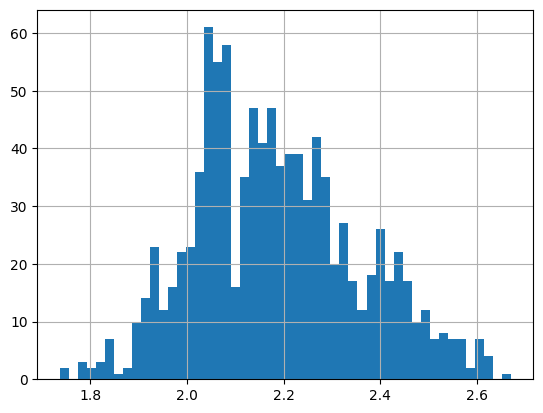

In [100]:
from feature_engine import transformation as vt

# set up the variable transformer
tf = vt.PowerTransformer(variables = ['DM'], exp=0.1)

# fit the transformer
tf.fit(data)

# transform the data
data_t5= tf.transform(data)


# un-transformed variable
data_t5['DM'].hist(bins=50)

## Transformacion Box-Cox

Una transformación de Box-Cox de los datos de su proceso puede ayudar a corregir las siguientes condiciones: Los datos del proceso no están distribuidos normalmente y problemas de heterocedasticidad (la varianza de los errores no es constante).

<Axes: >

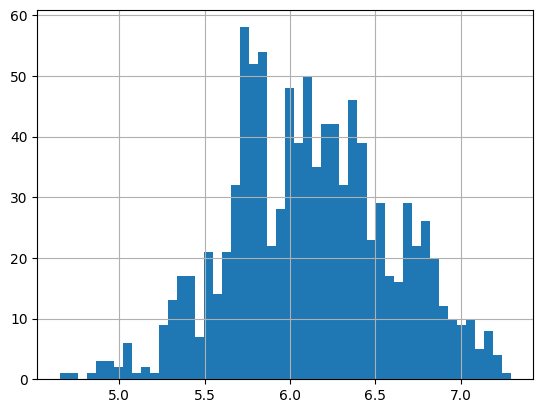

In [101]:
tf = vt.BoxCoxTransformer(variables = ['DM'])


tf.fit(data)


data_t5= tf.transform(data)


#box cox variable
data_t5['DM'].hist(bins=50)

## Transformacion de Yeo-Johnson

<Axes: >

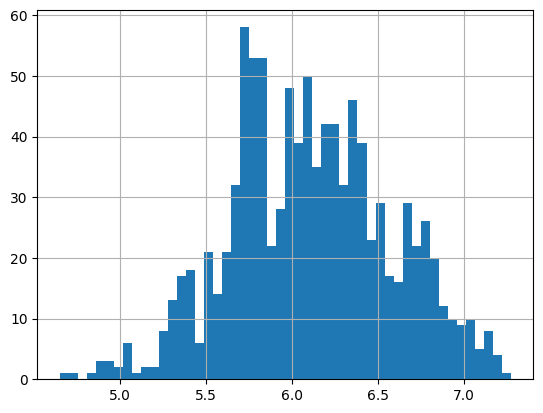

In [102]:
# set up the variable transformer
tf = vt.YeoJohnsonTransformer(variables = ['DM'])

# fit the transformer
tf.fit(data)

#Learns the optimal lambda for the Yeo-Johnson transformation.

# transform the data
data_t6= tf.transform(data)


# un-transformed variable
data_t6['DM'].hist(bins=50)

## Variables Dummy

In [103]:
data["Sexo"].head(10)

,Sexo
0,mujer
1,hombre
2,mujer
3,hombre
4,hombre
5,hombre
6,hombre
7,hombre
8,mujer
9,mujer


In [104]:
dummy_sex = pd.get_dummies(data["Sexo"], prefix="sex")

In [105]:
dummy_sex.head(10)

,sex_hombre,sex_mujer
0,False,True
1,True,False
2,False,True
3,True,False
4,True,False
5,True,False
6,True,False
7,True,False
8,False,True
9,False,True


In [106]:
from feature_engine.encoding import OneHotEncoder

In [107]:
ohe = OneHotEncoder()
ohe.fit(data)
data_ohe=ohe.transform(data)
data_ohe

,Mes,DM,DM_OR,Y_buen,Y_mal,Cuenta_no,Cuenta_bad running,Cuenta_good running,Ppag_pre buen pagador,Ppag_pre mal pagador,Uso_privado,Uso_profesional,Sexo_mujer,Sexo_hombre,Estc_vive solo,Estc_no vive solo
0,18,1049,1049,1,0,1,0,0,1,0,1,0,1,0,1,0
1,9,2799,2799,1,0,1,0,0,1,0,0,1,0,1,0,1
2,12,841,841,1,0,0,1,0,1,0,0,1,1,0,1,0
3,12,2122,2122,1,0,1,0,0,1,0,0,1,0,1,0,1
4,12,2171,2171,1,0,1,0,0,1,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,24,1987,1987,0,1,1,0,0,1,0,1,0,0,1,0,1
996,24,2303,2303,0,1,1,0,0,1,0,0,1,0,1,0,1
997,21,12680,12680,0,1,0,0,1,1,0,0,1,0,1,0,1
998,12,6468,6468,0,1,0,1,0,1,0,1,0,0,1,0,1


In [108]:
from feature_engine.encoding import CountFrequencyEncoder

In [109]:
cf = CountFrequencyEncoder(encoding_method='count')
cf.fit(data)
data_cf=cf.transform(data)
data_cf


,Y,Cuenta,Mes,Ppag,Uso,DM,Sexo,Estc,DM_OR
0,700,274,18,911,657,1049,402,360,1049
1,700,274,9,911,343,2799,598,640,2799
2,700,332,12,911,343,841,402,360,841
3,700,274,12,911,343,2122,598,640,2122
4,700,274,12,911,343,2171,598,640,2171
...,...,...,...,...,...,...,...,...,...
995,300,274,24,911,657,1987,598,640,1987
996,300,274,24,911,343,2303,598,640,2303
997,300,394,21,911,343,12680,598,640,12680
998,300,332,12,911,657,6468,598,640,6468
